## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import data 
df= sns.load_dataset('titanic')

In [11]:
# checking the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Finding the missing values

In [16]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [17]:
# droping the deck col beacause it has more than 60% missing values
df.drop(columns=['deck'], inplace=True)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [19]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## Filling the missing values

In [20]:
df["age"].mean()

np.float64(29.69911764705882)

In [24]:
# OLD CODE
#df['age'].fillna(df['age'].mean(), inplace=True)

In [25]:
df['age'] = df['age'].fillna(df['age'].mean())

In [26]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

## Fill embarked with mode

In [32]:
df['embarked'].mode()[0]


'S'

In [27]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

<Axes: >

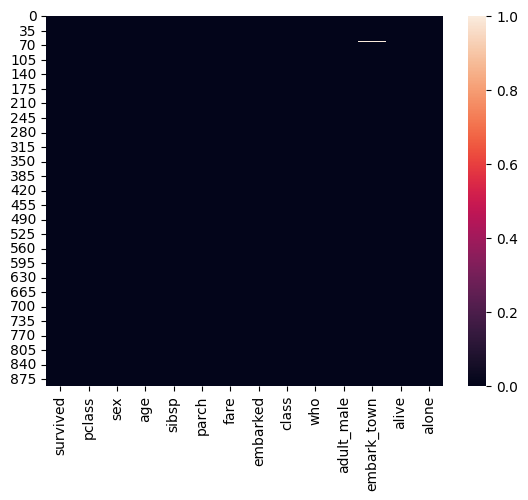

In [33]:
sns.heatmap(df.isnull())

<Axes: xlabel='age', ylabel='Count'>

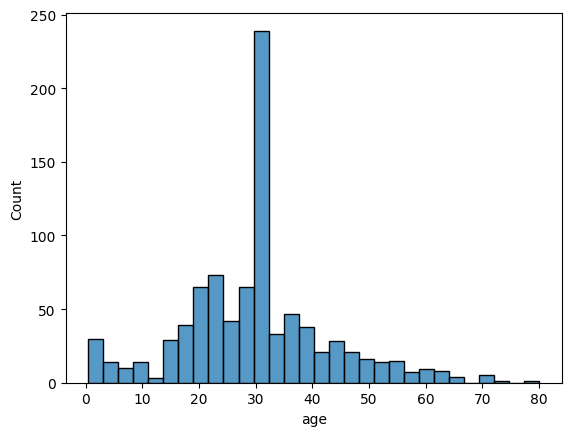

In [36]:
sns.histplot(df['age'])

# BINNING DATA

In [38]:
# binning age data into 7 categories
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['Infant', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly', 'Older']
pd.cut(df['age'], bins=bins, labels=labels)

0      Young Adult
1            Adult
2      Young Adult
3            Adult
4            Adult
          ...     
886    Young Adult
887       Teenager
888    Young Adult
889    Young Adult
890          Adult
Name: age, Length: 891, dtype: category
Categories (8, object): ['Infant' < 'Teenager' < 'Young Adult' < 'Adult' < 'Middle Aged' < 'Senior' < 'Elderly' < 'Older']

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


# Feature Engineering

## Adding new column

In [40]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['Infant', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly', 'Older']
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)



In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


In [42]:
df['binned_age'].value_counts()

binned_age
Young Adult    407
Adult          155
Teenager       115
Middle Aged     86
Infant          64
Senior          42
Elderly         17
Older            5
Name: count, dtype: int64

## renaming the columns

In [44]:
df.rename(columns={'binned_age': 'age_group'} , inplace=True)

In [45]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


# Data Filtering

In [46]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_group'],
      dtype='object')

In [47]:
df_01 = df[['survived', 'age_group','fare','class']]

In [48]:
df_01.head()

,survived,age_group,fare,class
0,0,Young Adult,7.2500,Third
1,1,Adult,71.2833,First
2,1,Young Adult,7.9250,Third
3,1,Adult,53.1000,First
4,0,Adult,8.0500,Third


In [50]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

## filtering based on rows criteria 

In [51]:
df_01[df_01['class'] == 'First']

,survived,age_group,fare,class
1,1,Adult,71.2833,First
3,1,Adult,53.1000,First
6,0,Senior,51.8625,First
11,1,Senior,26.5500,First
23,1,Young Adult,35.5000,First
...,...,...,...,...
871,1,Middle Aged,52.5542,First
872,0,Adult,5.0000,First
879,1,Senior,83.1583,First
887,1,Teenager,30.0000,First


In [53]:
df['fare'].value_counts()
df['fare'].max()


np.float64(512.3292)

In [55]:
# lets select those rows who paid more then 200 pounds 

df_200= df[df['fare'] > 200]

In [56]:
df_200['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64